In [107]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np

In [108]:
sampleRate = 40000
numSeconds = 1
times = np.linspace(0, numSeconds, sampleRate * numSeconds)
def omega(t):
        return 400 + 50*t
y = [np.sin(2 * omega(t) * np.pi * t) for t in times]

40000


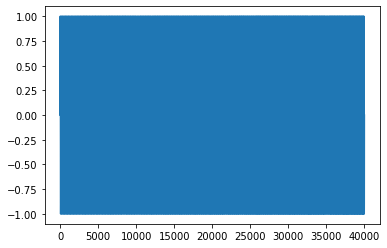

In [109]:
print(len(y))
plt.plot(y)

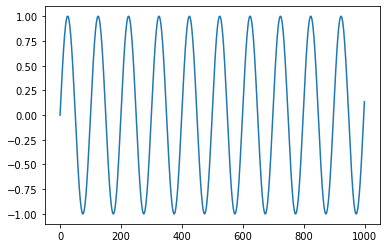

In [110]:
plt.plot(y[:1000]) # also plt.plot(y[-1000:])

In [111]:
import IPython
npy = 235 * np.array(y) # a volume adjustment
IPython.display.Audio(np.tile(npy, 5), rate=sampleRate) # click once, hear it 5 times

(40000,)


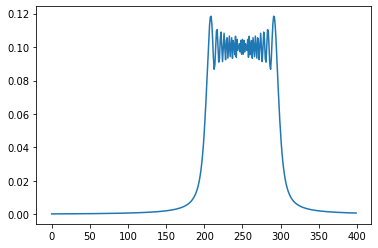

In [112]:
from scipy.fft import fft
f = 2 / sampleRate * fft(y)
print(f.shape)
plt.plot(np.abs(f[200:600]))

In [113]:
from scipy.signal import stft

f, t, Zxx = stft(y, fs=sampleRate, nfft=sampleRate, nperseg=1000)

print(type(f), type(t), type(Zxx))
print(f.shape, t.shape, Zxx.shape)
print(t[:10])
print(times[:10])

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20001,) (81,) (20001, 81)
[0.     0.0125 0.025  0.0375 0.05   0.0625 0.075  0.0875 0.1    0.1125]
[0.00000000e+00 2.50006250e-05 5.00012500e-05 7.50018750e-05
 1.00002500e-04 1.25003125e-04 1.50003750e-04 1.75004375e-04
 2.00005000e-04 2.25005625e-04]


In [114]:
print(f[:10]); print(f[-10:])

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[19991. 19992. 19993. 19994. 19995. 19996. 19997. 19998. 19999. 20000.]


[-6.05806100e-06+0.00000000e+00j -7.92672692e-06-2.39701502e-05j
 -1.34884566e-05-4.73667444e-05j ...  9.62073101e-12-4.74756422e-11j
  3.97476308e-12-2.40356099e-11j  2.07708861e-12+0.00000000e+00j]
20001


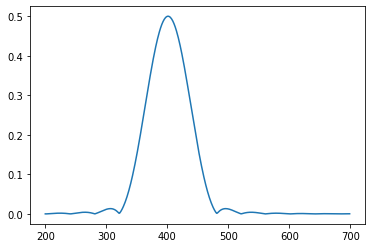

In [115]:
print(Zxx[:,1])
print(len(Zxx[:,1]))
plt.plot(f[200:700], np.abs(Zxx[200:700,1]))

[ 3.21395187e-02+0.00000000e+00j  3.20391930e-02-2.53402361e-03j
  3.17388630e-02-5.05207029e-03j ... -3.10404351e-05-4.91634659e-06j
 -3.13304817e-05-2.46577464e-06j -3.14273630e-05+0.00000000e+00j]
20001


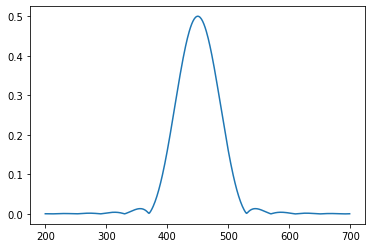

In [116]:
print(Zxx[:,0])
print(len(Zxx[:,40]))
plt.plot(f[200:700], np.abs(Zxx[200:700,40]))

[ 3.21395187e-02+0.00000000e+00j  3.20391930e-02-2.53402361e-03j
  3.17388630e-02-5.05207029e-03j ... -3.10404351e-05-4.91634659e-06j
 -3.13304817e-05-2.46577464e-06j -3.14273630e-05+0.00000000e+00j]
20001


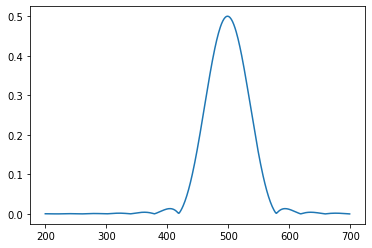

In [117]:
print(Zxx[:,0])
print(len(Zxx[:,79]))
plt.plot(f[200:700], np.abs(Zxx[200:700,79]))

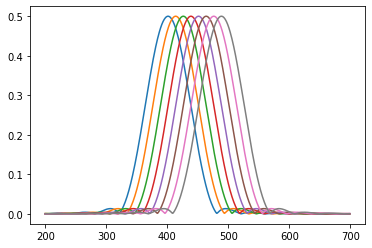

In [118]:
for x in range(1, 80, 10):
        plt.plot(f[200:700], np.abs(Zxx[200:700, x]))